##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Import TensorFlow and other libraries

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import shutil
import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load dataset

In [3]:
! rm -rf /root/.keras/datasets/oxford-102-flowers

In [4]:
import pathlib
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz"
data_dir = tf.keras.utils.get_file('oxford-102-flowers', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

345251840/345236087 [==============================] - 23s 0us/step


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8189


In [6]:
path_img=list(data_dir.glob('*/*.jpg'))
path_img[0]

PosixPath('/root/.keras/datasets/oxford-102-flowers/jpg/image_02525.jpg')

In [7]:
trn=pd.read_csv(data_dir/'train.txt',sep=" ",header=None)
val=pd.read_csv(data_dir/'valid.txt',sep=" ",header=None)
tst=pd.read_csv(data_dir/'test.txt',sep=" ",header=None)
all = trn.append(val,ignore_index=True).append(tst,ignore_index=True)
all.columns=['Img','Class']
all.index=all.Img
all.head()

,Img,Class
Img,,
jpg/image_03860.jpg,jpg/image_03860.jpg,16
jpg/image_06092.jpg,jpg/image_06092.jpg,13
jpg/image_02400.jpg,jpg/image_02400.jpg,42
jpg/image_02852.jpg,jpg/image_02852.jpg,55
jpg/image_07710.jpg,jpg/image_07710.jpg,96


# Split data into directories

In [8]:
selected = 7

In [9]:
top_selected = all.groupby(['Class']).count().sort_values('Img', ascending=False)[:selected]

In [10]:
top_selected.index

Int64Index([50, 76, 45, 72, 88, 73, 80], dtype='int64', name='Class')

In [11]:
if os.path.isdir(f"{data_dir}/jpg/chosen"):
  pass
else:
  os.mkdir(f"{data_dir}/jpg/chosen")

top_selected = top_selected.index.to_numpy()
for folder in top_selected:
    print(folder)
    if os.path.isdir(f"{data_dir}/jpg/chosen/{folder}"):
        pass
    else:
      os.mkdir(f"{data_dir}/jpg/chosen/{folder}")

50
76
45
72
88
73
80


In [12]:
if os.path.isdir(f"{data_dir}/jpg/test"):
  pass
else:
  os.mkdir(f"{data_dir}/jpg/test")

In [13]:
counter = 0
for index, row in all.iterrows():
  file_name = row[0][4:]
  if counter < 200:
    if row[1] in top_selected:
      shutil.move(f"{data_dir}/jpg/{file_name}", f"{data_dir}/jpg/test/{file_name}")
      counter = counter + 1
  else:
     if row[1] in top_selected:
      shutil.move(f"{data_dir}/jpg/{file_name}", f"{data_dir}/jpg/chosen/{row[1]}/{file_name}")

In [14]:
# Print contents of each folder
for folder in top_selected:
    print(f"\n\nContents of {folder}::::")
    #print(os.listdir(f"{data_dir}/jpg/chosen/{folder}"))



Contents of 50::::


Contents of 76::::


Contents of 45::::


Contents of 72::::


Contents of 88::::


Contents of 73::::


Contents of 80::::


In [15]:
# Print contents of each folder
print(os.listdir(f"{data_dir}/jpg/test/"))
print(len(os.listdir(f"{data_dir}/jpg/test/")))

['image_01270.jpg', 'image_01159.jpg', 'image_01445.jpg', 'image_00672.jpg', 'image_01459.jpg', 'image_01010.jpg', 'image_00442.jpg', 'image_00664.jpg', 'image_00444.jpg', 'image_00126.jpg', 'image_01185.jpg', 'image_00974.jpg', 'image_00411.jpg', 'image_00383.jpg', 'image_00023.jpg', 'image_01236.jpg', 'image_00825.jpg', 'image_01111.jpg', 'image_01019.jpg', 'image_00400.jpg', 'image_00355.jpg', 'image_01305.jpg', 'image_01261.jpg', 'image_00737.jpg', 'image_00143.jpg', 'image_00763.jpg', 'image_00401.jpg', 'image_00017.jpg', 'image_00297.jpg', 'image_00800.jpg', 'image_03957.jpg', 'image_00803.jpg', 'image_00322.jpg', 'image_00210.jpg', 'image_00921.jpg', 'image_00848.jpg', 'image_00328.jpg', 'image_01028.jpg', 'image_01188.jpg', 'image_00055.jpg', 'image_00685.jpg', 'image_00089.jpg', 'image_00640.jpg', 'image_00157.jpg', 'image_00392.jpg', 'image_00734.jpg', 'image_00744.jpg', 'image_00665.jpg', 'image_03935.jpg', 'image_01101.jpg', 'image_01372.jpg', 'image_00695.jpg', 'image_0066

In [16]:
print(os.listdir(f"{data_dir}/jpg/chosen/"))

['72', '73', '88', '76', '45', '80', '50']


In [17]:
#https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/oxford_flowers102.py
_NAMES = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells",
    "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation",
    "garden phlox", "love in the mist", "mexican aster", "alpine sea holly",
    "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
    "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy", "primula", "sunflower",
    "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani",
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum",
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper",
    "blackberry lily"
]

# Prepare data (normalize etc.)

In [18]:
batch_size = 32
img_height = 256
img_width = 256

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  f"{data_dir}/jpg/chosen",
  validation_split=0.2,
  subset="training",
  label_mode="int",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1220 files belonging to 7 classes.
Using 976 files for training.


In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  f"{data_dir}/jpg/chosen",
  validation_split=0.2,
  subset="validation",
  label_mode="int",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1220 files belonging to 7 classes.
Using 244 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)

['45', '50', '72', '73', '76', '80', '88']


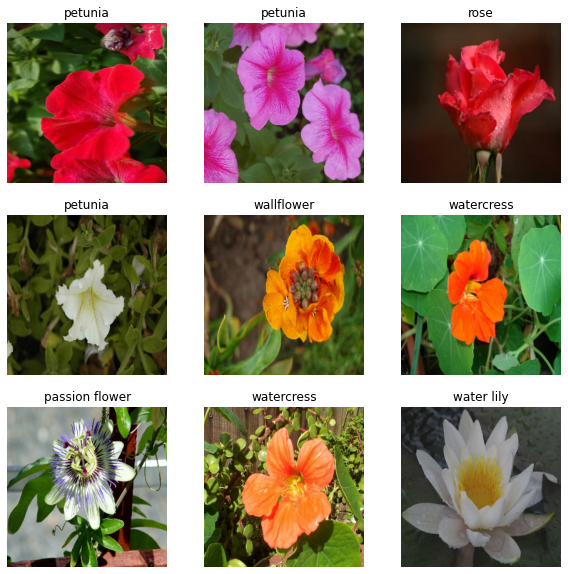

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(_NAMES[int(class_names[labels[i]])])
    plt.axis("off")

In [23]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [24]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
normalization_layer = layers.Rescaling(1./255)

In [26]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


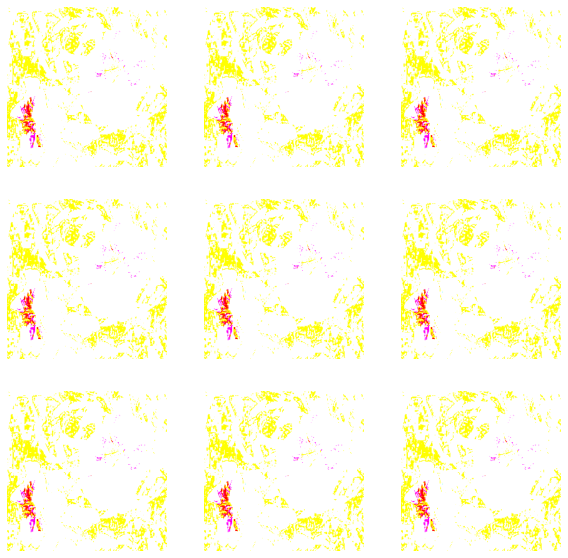

In [92]:
image, label = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

# Train

In [27]:
data_augmentation = keras.Sequential(
  [
    #layers.RandomFlip("horizontal_and_vertical",
              #       input_shape=(img_height,
                #                 img_width,
              ##                   3)),
    layers.RandomRotation(0.1660620226824105, input_shape=(img_height,
                                 img_width,
                                 3)),
    layers.RandomZoom(0),
    layers.RandomContrast(0.05),
    #layers.RandomTranslation(height_factor=0, width_factor=0, fill_mode="wrap"),
  ]
)

In [28]:
num_classes = selected

model = Sequential([
  data_augmentation,                  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [31]:
epochs=13
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/13
31/31 [==============================] - 102s 3s/step - loss: 1.6417 - accuracy: 0.3432 - val_loss: 1.4081 - val_accuracy: 0.4590
Epoch 2/13
31/31 [==============================] - 99s 3s/step - loss: 1.1975 - accuracy: 0.5195 - val_loss: 0.9150 - val_accuracy: 0.6189
Epoch 3/13
31/31 [==============================] - 95s 3s/step - loss: 0.9815 - accuracy: 0.6158 - val_loss: 0.7554 - val_accuracy: 0.6926
Epoch 4/13
31/31 [==============================] - 95s 3s/step - loss: 0.8012 - accuracy: 0.6824 - val_loss: 0.7601 - val_accuracy: 0.7295
Epoch 5/13
31/31 [==============================] - 95s 3s/step - loss: 0.7174 - accuracy: 0.7377 - val_loss: 0.8028 - val_accuracy: 0.6926
Epoch 6/13
31/31 [==============================] - 95s 3s/step - loss: 0.6653 - accuracy: 0.7582 - val_loss: 0.8856 - val_accuracy: 0.6926
Epoch 7/13
31/31 [==============================] - 95s 3s/step - loss: 0.6150 - accuracy: 0.7623 - val_loss: 0.4879 - val_accuracy: 0.8279
Epoch 8/13
31/31 [=

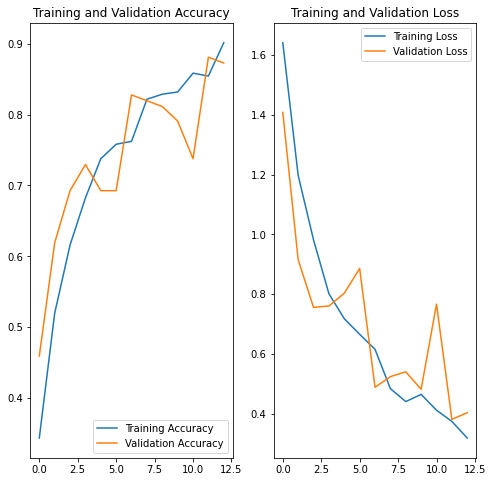

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction on new data

In [33]:
folder = pathlib.Path.joinpath(data_dir, "jpg")
folder = pathlib.Path.joinpath(folder, "test")
test_files = list(folder.glob('*.jpg'))

In [34]:
total = len(test_files)
correct = 0

for file_path in test_files:
  img = tf.keras.utils.load_img(file_path, target_size=(img_height, img_width))
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])


  file_name = "jpg/" + str(file_path)[-15:]
  #print(file_name)
  gt = all[all['Img']==file_name].iloc[0,1]

  #print("GT " + str(gt) + " odhadovano " + str(class_names[np.argmax(score)]))
  if int(gt) == int(class_names[np.argmax(score)]):
    correct = correct + 1

  
  #print(
  #  "This image most likely belongs to {} with a {:.2f} percent confidence."
  #  .format(class_names[np.argmax(score)], 100 * np.max(score))
  #  ) 

print("Accuracy: " + str(correct) + "/" + str(total) + ", " + str(correct/(total/100)) + " %")

Accuracy: 161/200, 80.5 %
